In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# **Reading Data**

In [87]:
dataset=load_iris()

In [88]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [89]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20
...,...,...,...,...
145,6.70,3.00,5.20,2.30
146,6.30,2.50,5.00,1.90
147,6.50,3.00,5.20,2.00
148,6.20,3.40,5.40,2.30


In [90]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.00,5.84,0.83,4.30,5.10,5.80,6.40,7.90
sepal width (cm),150.00,3.06,0.44,2.00,2.80,3.00,3.30,4.40
petal length (cm),150.00,3.76,1.77,1.00,1.60,4.35,5.10,6.90
petal width (cm),150.00,1.20,0.76,0.10,0.30,1.30,1.80,2.50


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# **Data Preprocessing**

In [92]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [93]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [94]:
np.unique(dataset.target,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

# **Data Visualization**

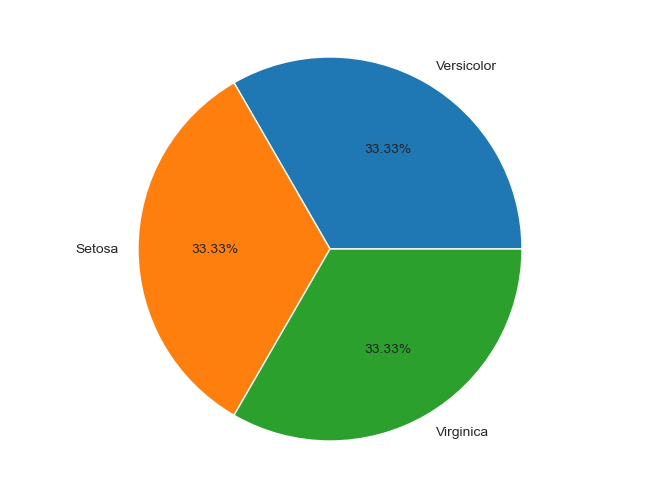

In [95]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

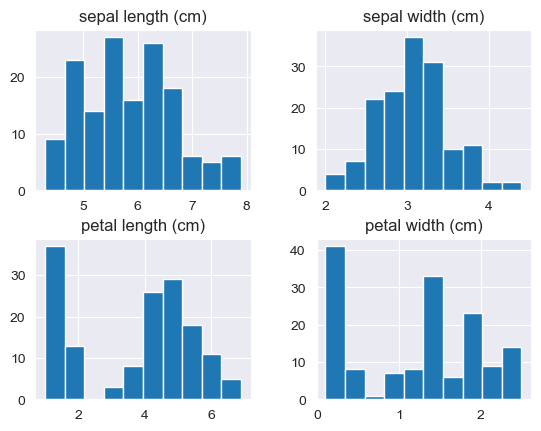

In [96]:
df.hist()

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

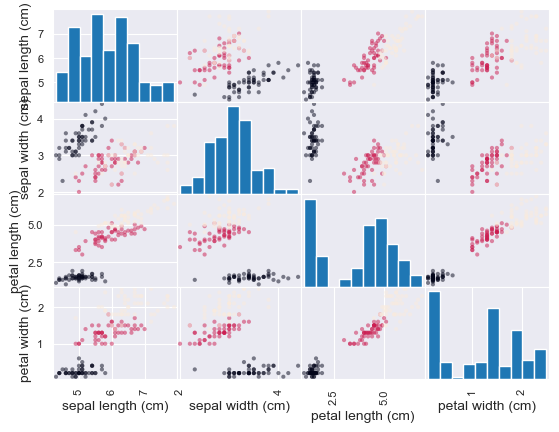

In [97]:
pd.plotting.scatter_matrix(df,c=dataset.target)

<Axes: >

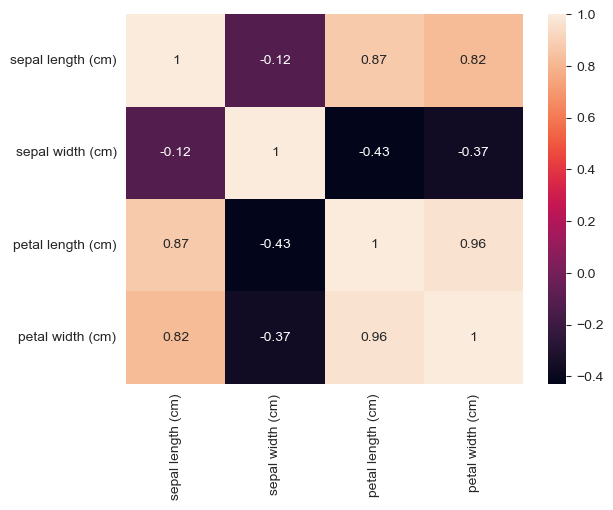

In [98]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

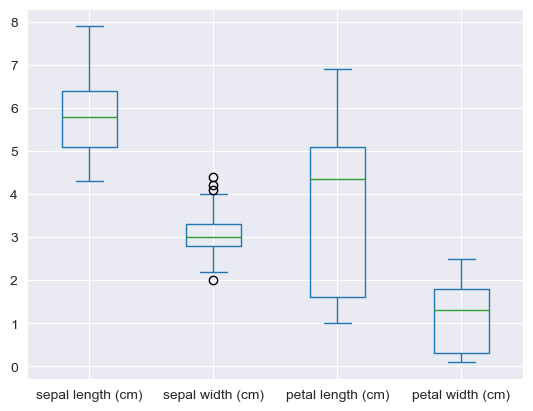

In [99]:
df.plot(kind='box')

# **Training**

In [100]:
x=dataset.data
y=dataset.target

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

# **LogisticRegression**

In [102]:
linear_model=LogisticRegression(penalty='l1',solver='saga',multi_class='ovr')

In [103]:
linear_model.fit(x_train,y_train)

LogisticRegression(multi_class='ovr', penalty='l1', solver='saga')

In [104]:
params={
    'penalty':['l1','l2'],
    'solver':['lbfgs','liblinear','saga']
}
grid=GridSearchCV(LogisticRegression(),param_grid=params,scoring='accuracy',cv=4)

In [105]:
grid.fit(x,y)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [106]:
grid.best_params_

{'penalty': 'l1', 'solver': 'saga'}

In [107]:
y_pred=linear_model.predict(x_test)
lg_accuracy=metrics.accuracy_score(y_test,y_pred)
print(lg_accuracy)
print(metrics.accuracy_score(y_pred,y_test))
print(metrics.mean_absolute_error(y_pred,y_test))

0.9555555555555556
0.9555555555555556
0.044444444444444446


In [108]:
cun_ma=metrics.confusion_matrix(y_test,y_pred)
print(cun_ma)
print(metrics.classification_report(y_test,y_pred))

[[12  0  0]
 [ 0 15  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.94        17
           2       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



# **SVM**

In [109]:
svm_model=svm.SVC()

In [110]:
svm_model.fit(x_train,y_train)

SVC()

In [111]:
svm_accuracy=metrics.accuracy_score(y_test,y_pred)
print(svm_accuracy)

0.9555555555555556


# **KNN**

In [112]:
knn_model=KNeighborsClassifier()

In [113]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [114]:
y_pred=knn_model.predict(x_test)
knn_accuracy=metrics.accuracy_score(y_test,y_pred)
print(knn_accuracy)
print(metrics.confusion_matrix(y_test,y_pred))

0.9777777777777777
[[12  0  0]
 [ 0 16  1]
 [ 0  0 16]]


# **DecisionTreeClassifier**

In [115]:
des_model=DecisionTreeClassifier()

In [116]:
des_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
y_pred=des_model.predict(x_test)

In [118]:
dt_accuracy=metrics.accuracy_score(y_test,y_pred)
print(dt_accuracy)

0.9555555555555556


In [119]:
model=pd.DataFrame({
    'Model':['LogisticRegression','Knn','SVM','DecisionTree'],
    'Accuracy':[lg_accuracy,knn_accuracy,svm_accuracy,dt_accuracy]

})
model.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,Knn,0.98
0,LogisticRegression,0.96
2,SVM,0.96
3,DecisionTree,0.96


In [120]:
from lazypredict.Supervised import LazyClassifier
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
model,predict=clf.fit(x_train,x_test,y_train,y_test)
print(model.Accuracy)

100%|██████████| 29/29 [00:02<00:00, 13.24it/s]

Model
QuadraticDiscriminantAnalysis   0.98
XGBClassifier                   0.96
DecisionTreeClassifier          0.96
RandomForestClassifier          0.96
BaggingClassifier               0.96
LinearDiscriminantAnalysis      0.96
LGBMClassifier                  0.93
CalibratedClassifierCV          0.93
SGDClassifier                   0.93
ExtraTreesClassifier            0.93
LogisticRegression              0.93
SVC                             0.93
PassiveAggressiveClassifier     0.93
NuSVC                           0.93
AdaBoostClassifier              0.93
LabelSpreading                  0.93
LabelPropagation                0.93
KNeighborsClassifier            0.93
GaussianNB                      0.93
ExtraTreeClassifier             0.91
NearestCentroid                 0.91
LinearSVC                       0.91
Perceptron                      0.89
RidgeClassifierCV               0.87
RidgeClassifier                 0.84
BernoulliNB                     0.73
DummyClassifier                 